# Cleaning Data

In this notebook we start the analizing the two dataset and correct errors


In [245]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
from scipy.stats.mstats import winsorize


# Taxi Dataset

We start from the taxi dataset

In [195]:
df = pd.read_csv(Path("data/Chicago_Taxi_Trips_2020_10percent.csv")) # this open the csv dataset considering the path
#print(df.head()) #first 5 lines

df.columns = [c.replace(' ', '_') for c in df.columns]  #replaces spaces in columns with underscores

In [196]:
df.head()

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,Extras,Trip_Total,Payment_Type,Company,Pickup_Centroid_Latitude,Pickup_Centroid_Longitude,Pickup_Centroid_Location,Dropoff_Centroid_Latitude,Dropoff_Centroid_Longitude,Dropoff_Centroid__Location
0,7fa9327d2a62e0f1f9eac0f5a4ca0bb5338c22b2,03906d62f91d139ab93f74f50d1b208805b7fbb61e8d1e...,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,178.0,0.48,1.703132e+10,1.703132e+10,32.0,32.0,...,3.0,10.00,Credit Card,Flash Cab,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
1,493354c5b05333aeeb05055a4914c5d38bacef60,ca885a78545e9a44a5f365164cfbaca32fee95082b0d4f...,01/01/2020 12:00:00 AM,01/01/2020 12:30:00 AM,1200.0,5.30,NaN,NaN,8.0,23.0,...,0.0,20.10,Credit Card,Star North Management LLC,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.900070,-87.720918,POINT (-87.7209182385 41.9000696026)
2,450f3aa6b31aa37cbb7c972f92a9ba31ab506c79,81bc2020b8536280419b3e152ad07a0c5b9f53cbb503a0...,01/01/2020 12:00:00 AM,01/01/2020 12:15:00 AM,540.0,1.70,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,8.00,Cash,Taxi Affiliation Services,41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),41.892073,-87.628874,POINT (-87.6288741572 41.8920726347)
3,39100cdb94f6da6b54f71f1d1cdc2ba330f97e09,a548c63608ec50e02a2311a0b6b1b2274995e3637ccb4c...,01/01/2020 12:00:00 AM,01/01/2020 12:15:00 AM,419.0,0.98,1.703128e+10,1.703184e+10,28.0,32.0,...,1.0,7.50,Cash,City Service,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
4,36bbb8cf2622b3ce7dde8f6bbaacc903a8403333,33164e16dd29b1c58cd15cce31df4bfcb75d9903cb66de...,01/01/2020 12:00:00 AM,01/01/2020 12:30:00 AM,1800.0,1.50,1.703128e+10,1.703132e+10,28.0,32.0,...,1.0,15.25,Cash,Medallion Leasin,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)


In [197]:
df.shape

(342292, 23)

### Data preparation - Time

In [198]:
#This code recognises AM/PM difference
df.Trip_Start_Timestamp = pd.to_datetime(df.Trip_Start_Timestamp, format='%m/%d/%Y %I:%M:%S %p')
df.Trip_End_Timestamp = pd.to_datetime(df.Trip_End_Timestamp, format='%m/%d/%Y %I:%M:%S %p')
#This line excludes trips that End before Starting (90 trips)
df = df[df.Trip_End_Timestamp >= df.Trip_Start_Timestamp]

In [199]:
#TODO ci sarebbe da controllare se la durata in secondi sia la stessa della differenza fra partenza e arrivo
#df=df[(df.Trip_End_Timestamp-df.Trip_Start_Timestamp)==pd.to_timedelta(df.Trip_Seconds * 10 ** 9)]

In [200]:
df.shape

(342202, 23)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342202 entries, 0 to 342291
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Trip_ID                     342202 non-null  object        
 1   Taxi_ID                     342184 non-null  object        
 2   Trip_Start_Timestamp        342202 non-null  datetime64[ns]
 3   Trip_End_Timestamp          342202 non-null  datetime64[ns]
 4   Trip_Seconds                342158 non-null  float64       
 5   Trip_Miles                  342201 non-null  float64       
 6   Pickup_Census_Tract         174058 non-null  float64       
 7   Dropoff_Census_Tract        172967 non-null  float64       
 8   Pickup_Community_Area       318231 non-null  float64       
 9   Dropoff_Community_Area      310704 non-null  float64       
 10  Fare                        342168 non-null  float64       
 11  Tips                        342168 non-

In [202]:
df.head()

,Trip_ID,Taxi_ID,Trip_Start_Timestamp,Trip_End_Timestamp,Trip_Seconds,Trip_Miles,Pickup_Census_Tract,Dropoff_Census_Tract,Pickup_Community_Area,Dropoff_Community_Area,...,Extras,Trip_Total,Payment_Type,Company,Pickup_Centroid_Latitude,Pickup_Centroid_Longitude,Pickup_Centroid_Location,Dropoff_Centroid_Latitude,Dropoff_Centroid_Longitude,Dropoff_Centroid__Location
0,7fa9327d2a62e0f1f9eac0f5a4ca0bb5338c22b2,03906d62f91d139ab93f74f50d1b208805b7fbb61e8d1e...,2020-01-01,2020-01-01 00:00:00,178.0,0.48,1.703132e+10,1.703132e+10,32.0,32.0,...,3.0,10.00,Credit Card,Flash Cab,41.877406,-87.621972,POINT (-87.6219716519 41.8774061234),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
1,493354c5b05333aeeb05055a4914c5d38bacef60,ca885a78545e9a44a5f365164cfbaca32fee95082b0d4f...,2020-01-01,2020-01-01 00:30:00,1200.0,5.30,NaN,NaN,8.0,23.0,...,0.0,20.10,Credit Card,Star North Management LLC,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.900070,-87.720918,POINT (-87.7209182385 41.9000696026)
2,450f3aa6b31aa37cbb7c972f92a9ba31ab506c79,81bc2020b8536280419b3e152ad07a0c5b9f53cbb503a0...,2020-01-01,2020-01-01 00:15:00,540.0,1.70,1.703108e+10,1.703108e+10,8.0,8.0,...,0.0,8.00,Cash,Taxi Affiliation Services,41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),41.892073,-87.628874,POINT (-87.6288741572 41.8920726347)
3,39100cdb94f6da6b54f71f1d1cdc2ba330f97e09,a548c63608ec50e02a2311a0b6b1b2274995e3637ccb4c...,2020-01-01,2020-01-01 00:15:00,419.0,0.98,1.703128e+10,1.703184e+10,28.0,32.0,...,1.0,7.50,Cash,City Service,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
4,36bbb8cf2622b3ce7dde8f6bbaacc903a8403333,33164e16dd29b1c58cd15cce31df4bfcb75d9903cb66de...,2020-01-01,2020-01-01 00:30:00,1800.0,1.50,1.703128e+10,1.703132e+10,28.0,32.0,...,1.0,15.25,Cash,Medallion Leasin,41.885300,-87.642808,POINT (-87.6428084655 41.8853000224),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)


### Data preparation - MV

In [203]:
df.shape

(342202, 23)

We count the number of missing values for each columns

In [204]:
df.isnull().sum()

Trip_ID                            0
Taxi_ID                           18
Trip_Start_Timestamp               0
Trip_End_Timestamp                 0
Trip_Seconds                      44
Trip_Miles                         1
Pickup_Census_Tract           168144
Dropoff_Census_Tract          169235
Pickup_Community_Area          23971
Dropoff_Community_Area         31498
Fare                              34
Tips                              34
Tolls                             34
Extras                            34
Trip_Total                        34
Payment_Type                       0
Company                            0
Pickup_Centroid_Latitude       23919
Pickup_Centroid_Longitude      23919
Pickup_Centroid_Location       23919
Dropoff_Centroid_Latitude      30855
Dropoff_Centroid_Longitude     30855
Dropoff_Centroid__Location     30855
dtype: int64

Using the description given from the City of Chicago we can assume that there are
from 23930 to 30916 trips from (or to) locations outside Chicago.

We firstly check if there are totally empty rows. We will remove them.

In [205]:
df.dropna(how='all').shape

(342202, 23)

Turns out that the all rows have at least one valid value

### Statistics

In [206]:
from scipy.stats import median_abs_deviation #as median_abs_deviation

The following function will help us to compute some statics useful to analyze our data.
???Or correct NaN value using the Winsorizing approach with a reasonable approach to the correct percentile.

In [207]:
def statistics(variable):
    stats = {}
    stats['mean'] = variable.mean()
    stats['std'] = variable.std()
    stats['max'] = variable.max()
    stats['min'] = variable.min()
    stats['median'] = np.nanmedian(variable)  #NANmedian invece di median
    stats['1%'] = np.nanpercentile(variable, 1)
    stats['5%'] = np.nanpercentile(variable, 5)
    stats['10%'] = np.nanpercentile(variable,10)  #NANpercentile invece di percentile
    stats['17,5%'] = np.nanpercentile(variable,17.5)
    stats['25%'] = np.nanpercentile(variable,25)  #NANpercentile invece di percentile
    stats['75%'] = np.nanpercentile(variable,75)  #NANpercentile invece di percentile
    stats['95%'] = np.nanpercentile(variable, 95)
    stats['99%'] = np.nanpercentile(variable,99)  #NANpercentile invece di percentile
    stats['99.5%'] = np.nanpercentile(variable,99.5)  #NANpercentile invece di percentile
    stats['99.9%'] = np.nanpercentile(variable,99.9)  #NANpercentile invece di percentile
    stats['mad'] = median_abs_deviation(variable, nan_policy = 'omit')
    return stats

#### Starting from Trip Seconds...

In [208]:
stat_Trip_Seconds = statistics(df.Trip_Seconds)
stat_Trip_Seconds

{'mean': 849.9995382250305,
 'std': 1687.5361388391007,
 'max': 85320.0,
 'min': 0.0,
 'median': 560.0,
 '1%': 0.0,
 '5%': 60.0,
 '10%': 180.0,
 '17,5%': 276.0,
 '25%': 346.0,
 '75%': 1020.0,
 '95%': 2280.0,
 '99%': 3600.0,
 '99.5%': 4380.0,
 '99.9%': 13835.686000000103,
 'mad': 280.0}

Max value of the Trip duration (in seconds) is 85320 seconds, or 23.7h. This does not make any sense and we think that is an outlier.

For this columns we consider a Winsorizing or Trimming of 10% -
We discard values above 99.5th percentiles since they are over 73 min.

We do not consider values below 10th percentiles because trips below 3 min are meaningless.

#### Now the Trip Miles

In [210]:
statistics(df.Trip_Miles)

{'mean': 3.560115487681085,
 'std': 6.551665311263606,
 'max': 980.5,
 'min': 0.0,
 'median': 1.21,
 '1%': 0.0,
 '5%': 0.0,
 '10%': 0.0,
 '17,5%': 0.1,
 '25%': 0.5,
 '75%': 3.55,
 '95%': 17.12,
 '99%': 21.2,
 '99.5%': 26.3,
 '99.9%': 37.72,
 'mad': 1.1099999999999999}

We see that Max = 980 Miles is clearly an outlier. It's grater than the distance needed to go from Chicago to New York.

Winsorizing: < 25th percentile equal to the 25th percentile because trips are less than 0.5 Miles.

Values above 99.9th percentile are instead discarded (study area is about 40km wide on its longest axis).

In [211]:
#TODO escludere gli outlier presenti in Trips Miles and Trips


#### Fares

In [212]:
statistics(df.Fare)

{'mean': 15.17660166935534,
 'std': 79.15006408275688,
 'max': 9004.25,
 'min': 0.0,
 'median': 8.25,
 '1%': 3.25,
 '5%': 3.5,
 '10%': 4.75,
 '17,5%': 5.25,
 '25%': 6.0,
 '75%': 16.0,
 '95%': 43.75,
 '99%': 57.5,
 '99.5%': 70.0,
 '99.9%': 117.7082500000106,
 'mad': 3.0}

Winsorizing at 1,1%: exludes below 1st percentile (which is the Base Fare as written on the Chicago.gov website).
Above the 99.9th percentile (higher values are probably caused by outliers from Miles and Trips).


#### Tips

In [213]:
statistics(df.Tips)

{'mean': 1.5499525087091246,
 'std': 2.925299939588448,
 'max': 300.0,
 'min': 0.0,
 'median': 0.0,
 '1%': 0.0,
 '5%': 0.0,
 '10%': 0.0,
 '17,5%': 0.0,
 '25%': 0.0,
 '75%': 2.0,
 '95%': 8.5,
 '99%': 11.94,
 '99.5%': 13.65,
 '99.9%': 20.0,
 'mad': 0.0}

 This is a subjetive value of each people so we think that is better
 to just ignore values above the 99.9th percentile.

#### Tolls

In [214]:
statistics(df.Tolls)

{'mean': 0.0016760187977835433,
 'std': 0.12918199844049413,
 'max': 50.0,
 'min': 0.0,
 'median': 0.0,
 '1%': 0.0,
 '5%': 0.0,
 '10%': 0.0,
 '17,5%': 0.0,
 '25%': 0.0,
 '75%': 0.0,
 '95%': 0.0,
 '99%': 0.0,
 '99.5%': 0.0,
 '99.9%': 0.0,
 'mad': 0.0}

 This is influnced by the trips outside Chicago we need to reanalyze  after

#### Extras

In [215]:
statistics(df.Extras)

{'mean': 1.1245977999111545,
 'std': 27.532543514501782,
 'max': 9900.66,
 'min': 0.0,
 'median': 0.0,
 '1%': 0.0,
 '5%': 0.0,
 '10%': 0.0,
 '17,5%': 0.0,
 '25%': 0.0,
 '75%': 1.0,
 '95%': 4.0,
 '99%': 17.0,
 '99.5%': 28.0,
 '99.9%': 48.5,
 'mad': 0.0}

#### Trip Total

In [216]:
statistics(df.Trip_Total)

{'mean': 17.967640720347344,
 'std': 84.33257788646299,
 'max': 9903.91,
 'min': 0.0,
 'median': 9.85,
 '1%': 3.25,
 '5%': 4.0,
 '10%': 5.25,
 '17,5%': 6.25,
 '25%': 7.0,
 '75%': 18.25,
 '95%': 55.0,
 '99%': 74.2,
 '99.5%': 90.75,
 '99.9%': 155.16660000000846,
 'mad': 3.8499999999999996}

In [217]:
#solo colonne su cui ha senso fare media, mediana, ecc...
#num_features = [4,5,10,11,12,13,14]
#num_features = ['Trip_Seconds','Trip_Miles','Fare','Tips','Tolls','Extras','Trip_Total']

In [218]:
#def summarize(data, features):
    #summary = {}
    #for i in range(6):
        #summary[i] = statistics(data.iloc[:,features[i]])
    #return summary

In [219]:
#summarize(df,num_features)

### Distance Travelled

G:\Programmi\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
G:\Programmi\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


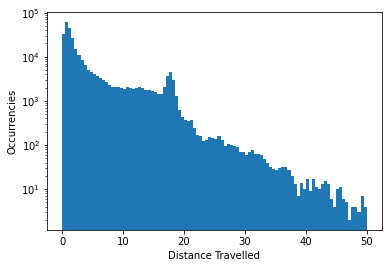

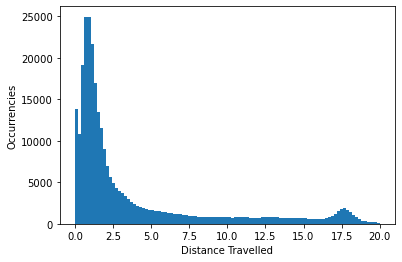

In [220]:
#limito il range nel grafico o direttamente elimino i dati sopra il 99 percentile dal database

plt.hist(df.Trip_Miles, bins = 100, range = (0.01, 50))
plt.yscale('log')   #scala logaritmica
plt.xlabel('Distance Travelled')
plt.ylabel('Occurrencies')
plt.show()

plt.hist(df.Trip_Miles, bins = 100, range = (0.01, 20))
plt.xlabel('Distance Travelled')
plt.ylabel('Occurrencies')
plt.show()

#### Investigo perchè ci sono tanti viaggi di 17.5 miglia

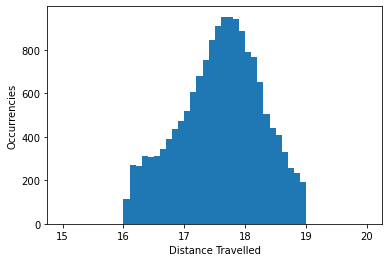

In [221]:
#isolo i viaggi tra 16 e 19 miglia
trips = df[(df.Trip_Miles > 16) & (df.Trip_Miles < 19)]

plt.hist(trips.Trip_Miles, bins = 50, range = (15, 20))
plt.xlabel('Distance Travelled')
plt.ylabel('Occurrencies')
plt.show()

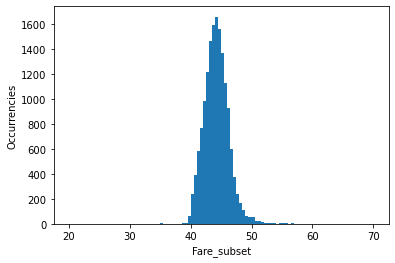

In [222]:
#visualizzo prezzo dei viaggi tra 16 e 19 miglia
plt.hist(trips.Fare, bins = 100, range = (20, 70))
plt.xlabel('Fare_subset')
plt.ylabel('Occurrencies')
plt.show()

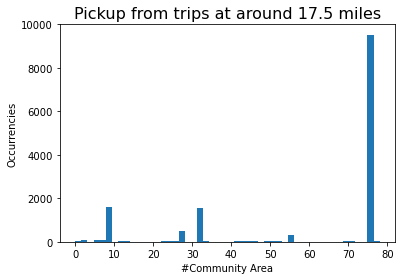

In [223]:
# molti viaggi tra 16 e 19 miglia partono da Community_Area 76 - O'Hare Airport
plt.hist(trips.Pickup_Community_Area, bins = 50, range = (0, 78))
plt.xlabel('#Community Area')
plt.ylabel('Occurrencies')
plt.title('Pickup from trips at around 17.5 miles', fontsize = 16)
plt.show()

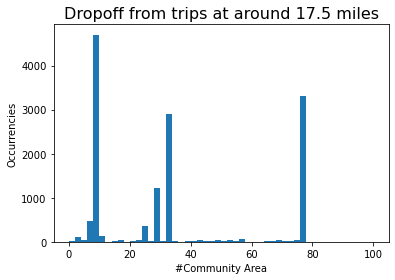

In [224]:
# molti viaggi tra 16 e 19 miglia vanno a Community_Area 8,24,28,32,76
# 8: Near North Side - 24: West Town - 28: Near West Side - 32: Loop
plt.hist(trips.Dropoff_Community_Area, bins = 50, range = (0, 100))
plt.xlabel('#Community Area')
plt.ylabel('Occurrencies')
plt.title('Dropoff from trips at around 17.5 miles', fontsize = 16)
plt.show()

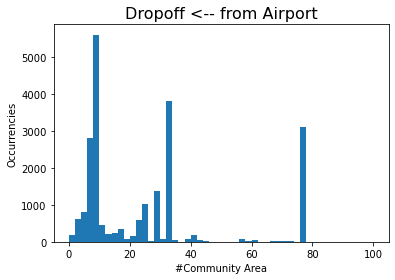

In [225]:
#isolo SOLO i viaggi che partono da Community Area 76 (aeroporto)
from_76 = df[df.Pickup_Community_Area == 76]
#plotto dove va la gente che parte dall'aeroporto
plt.hist(from_76.Dropoff_Community_Area, bins = 50, range = (0, 100))
plt.xlabel('#Community Area')
plt.ylabel('Occurrencies')
plt.title('Dropoff <-- from Airport', fontsize = 16)
plt.show()

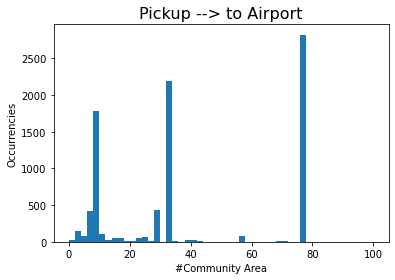

In [226]:
#isolo SOLO i viaggi che arrivano a Community Area 76 (aeroporto)
to_76 = df[df.Dropoff_Community_Area == 76]
#plotto da dove parte la gente che arriva all'aeroporto
plt.hist(to_76.Pickup_Community_Area, bins = 50, range = (0, 100))
plt.xlabel('#Community Area')
plt.ylabel('Occurrencies')
plt.title('Pickup --> to Airport', fontsize = 16)
plt.show()

### Pickup/Dropoff delle Community Areas

#### In istogramma

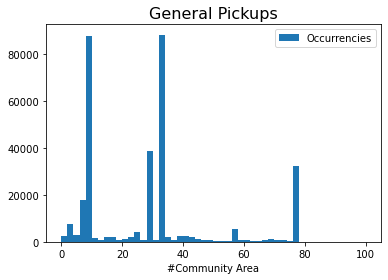

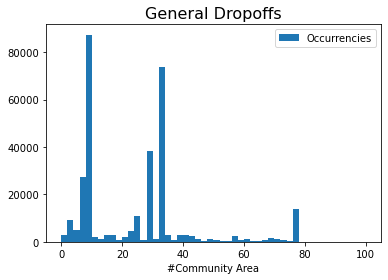

In [227]:
plt.hist(df.Pickup_Community_Area, bins = 50, range = (0, 100), label='Occurrencies')
plt.xlabel('#Community Area')
plt.title('General Pickups', fontsize = 16)
plt.legend()
plt.show()

plt.hist(df.Dropoff_Community_Area, bins = 50, range = (0, 100), label='Occurrencies')
plt.xlabel('#Community Area')
plt.title('General Dropoffs', fontsize = 16)
plt.legend()
plt.show()

#### In coordinate geografiche

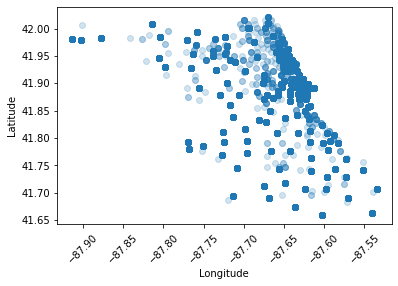

<Figure size 800x800 with 0 Axes>

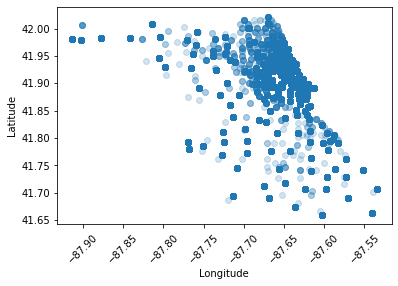

In [228]:
#Partenza
plt.scatter(df.Pickup_Centroid_Longitude, df.Pickup_Centroid_Latitude, alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks(rotation=45)
plt.figure(figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.show()
#Arrivo
plt.scatter(df.Dropoff_Centroid_Longitude, df.Dropoff_Centroid_Latitude, alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks(rotation=45)
plt.show()

### Trip Duration

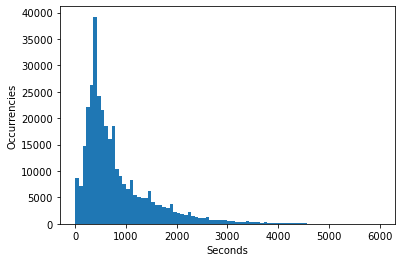

In [229]:
plt.hist(df.Trip_Seconds, bins = 84, range = (1, 6000))
#plt.yscale('log')
plt.xlabel('Seconds')
plt.ylabel('Occurrencies')
plt.show()

### Fares and Extras

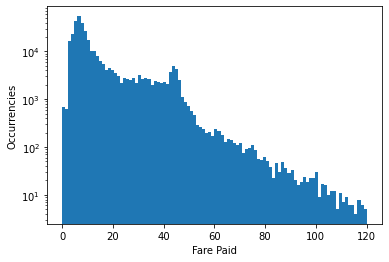

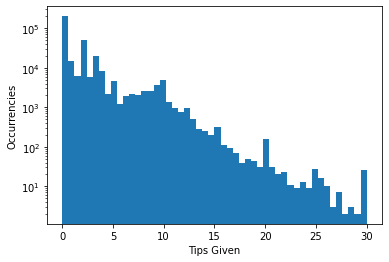

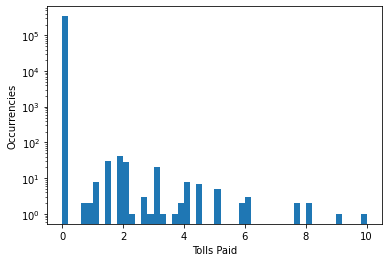

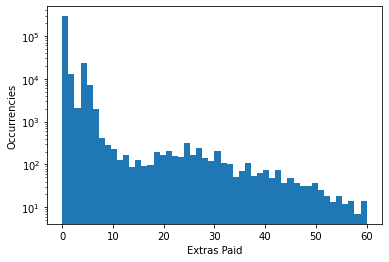

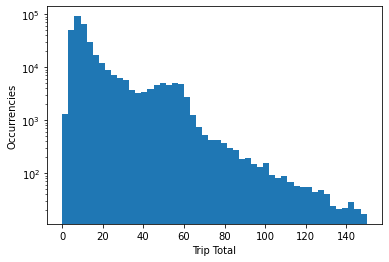

In [230]:
#scala logaritmica

plt.hist(df.Fare, bins = 100, range = (0, 120))
plt.yscale('log')
plt.xlabel('Fare Paid')
plt.ylabel('Occurrencies')
plt.show()

plt.hist(df.Tips, bins = 50, range = (0, 30))
plt.yscale('log')
plt.xlabel('Tips Given')
plt.ylabel('Occurrencies')
plt.show()

plt.hist(df.Tolls, bins = 50, range = (0, 10))
plt.yscale('log')
plt.xlabel('Tolls Paid')
plt.ylabel('Occurrencies')
plt.show()

plt.hist(df.Extras, bins = 50, range = (0, 60))
plt.yscale('log')
plt.xlabel('Extras Paid')
plt.ylabel('Occurrencies')
plt.show()

plt.hist(df.Trip_Total, bins = 50, range = (0, 150))
plt.yscale('log')
plt.xlabel('Trip Total')
plt.ylabel('Occurrencies')
plt.show()

### Payment Method

In [231]:
df.Payment_Type.value_counts()

Cash           167025
Credit Card    142360
Prcard          14912
Unknown         11125
Mobile           6110
No Charge         456
Dispute           193
Prepaid            21
Name: Payment_Type, dtype: int64

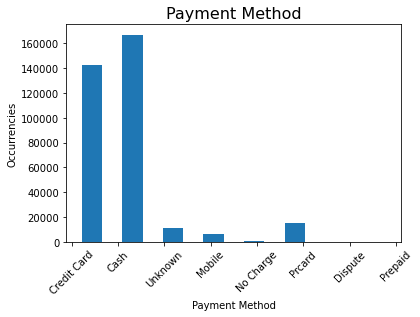

In [232]:
plt.hist(df.Payment_Type, bins = 8, rwidth=0.5)
plt.xlabel('Payment Method')
plt.ylabel('Occurrencies')
plt.title('Payment Method', fontsize = 16)
plt.xticks(rotation=45)
plt.show()

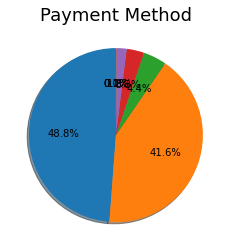

In [233]:
plt.pie(df.Payment_Type.value_counts(), shadow=True, autopct='%1.1f%%', startangle=90)
plt.title('Payment Method', fontsize=18)
#plt.legend()
plt.show()

### Timestamps (formato americano: mese-gg-anno)

In [234]:
df.Trip_Start_Timestamp = pd.to_datetime(df.Trip_Start_Timestamp)
df.Trip_Start_Timestamp

0        2020-01-01 00:00:00
1        2020-01-01 00:00:00
2        2020-01-01 00:00:00
3        2020-01-01 00:00:00
4        2020-01-01 00:00:00
                 ...        
342287   2020-09-30 23:30:00
342288   2020-09-30 23:30:00
342289   2020-09-30 23:45:00
342290   2020-09-30 23:45:00
342291   2020-10-01 00:00:00
Name: Trip_Start_Timestamp, Length: 342202, dtype: datetime64[ns]

In [235]:
df.Trip_Start_Timestamp.min()

Timestamp('2020-01-01 00:00:00')

In [236]:
df.Trip_Start_Timestamp.max()

Timestamp('2020-10-01 00:00:00')

### Companies

In [237]:
under1000 = df.Company.value_counts() < 100
under1000

Taxi Affiliation Services                       False
Flash Cab                                       False
Chicago Carriage Cab Corp                       False
Sun Taxi                                        False
Medallion Leasin                                False
City Service                                    False
Star North Management LLC                       False
Blue Ribbon Taxi Association Inc.               False
Taxicab Insurance Agency, LLC                   False
Choice Taxi Association                         False
Chicago Independents                            False
Top Cab Affiliation                             False
Patriot Taxi Dba Peace Taxi Associat            False
24 Seven Taxi                                   False
Nova Taxi Affiliation Llc                       False
Chicago Taxicab                                 False
KOAM Taxi Association                           False
Setare Inc                                      False
U Taxicab                   

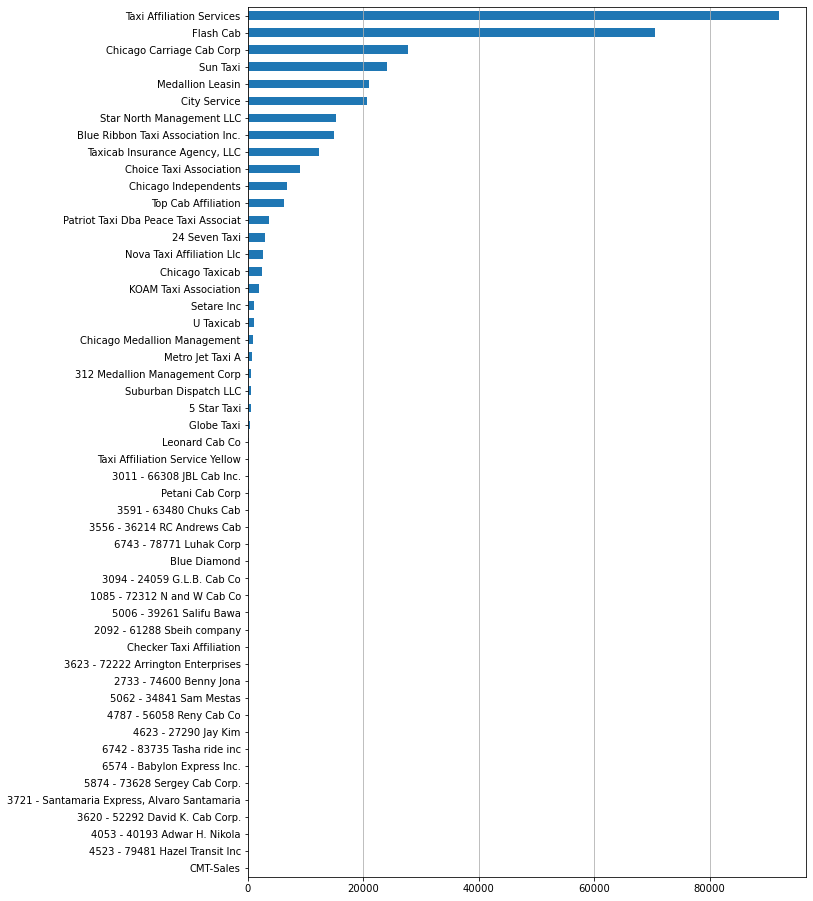

In [238]:
df.Company.value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,16), fontsize=10)
plt.grid(b=None, which='major', axis='x')

#### Trovo costo medio per ogni compagnia

In [239]:
#segna in un array tutti i nomi della categoria
company_names = df.Company.unique()

In [240]:
#calcola prezzo per minuto (ppm)
dollar_per_min = np.zeros(len(company_names))
for i in range(len(company_names)):  #per ogni nome...
    subset = df[df.Company == company_names[i]]
    num = subset.Trip_Total.mean()
    den = ((subset.Trip_Seconds.mean()/60))  #trip duration in minutes]
    if(den == 0):
        dollar_per_min[i] = 0
    else:
        dollar_per_min[i] = num/den

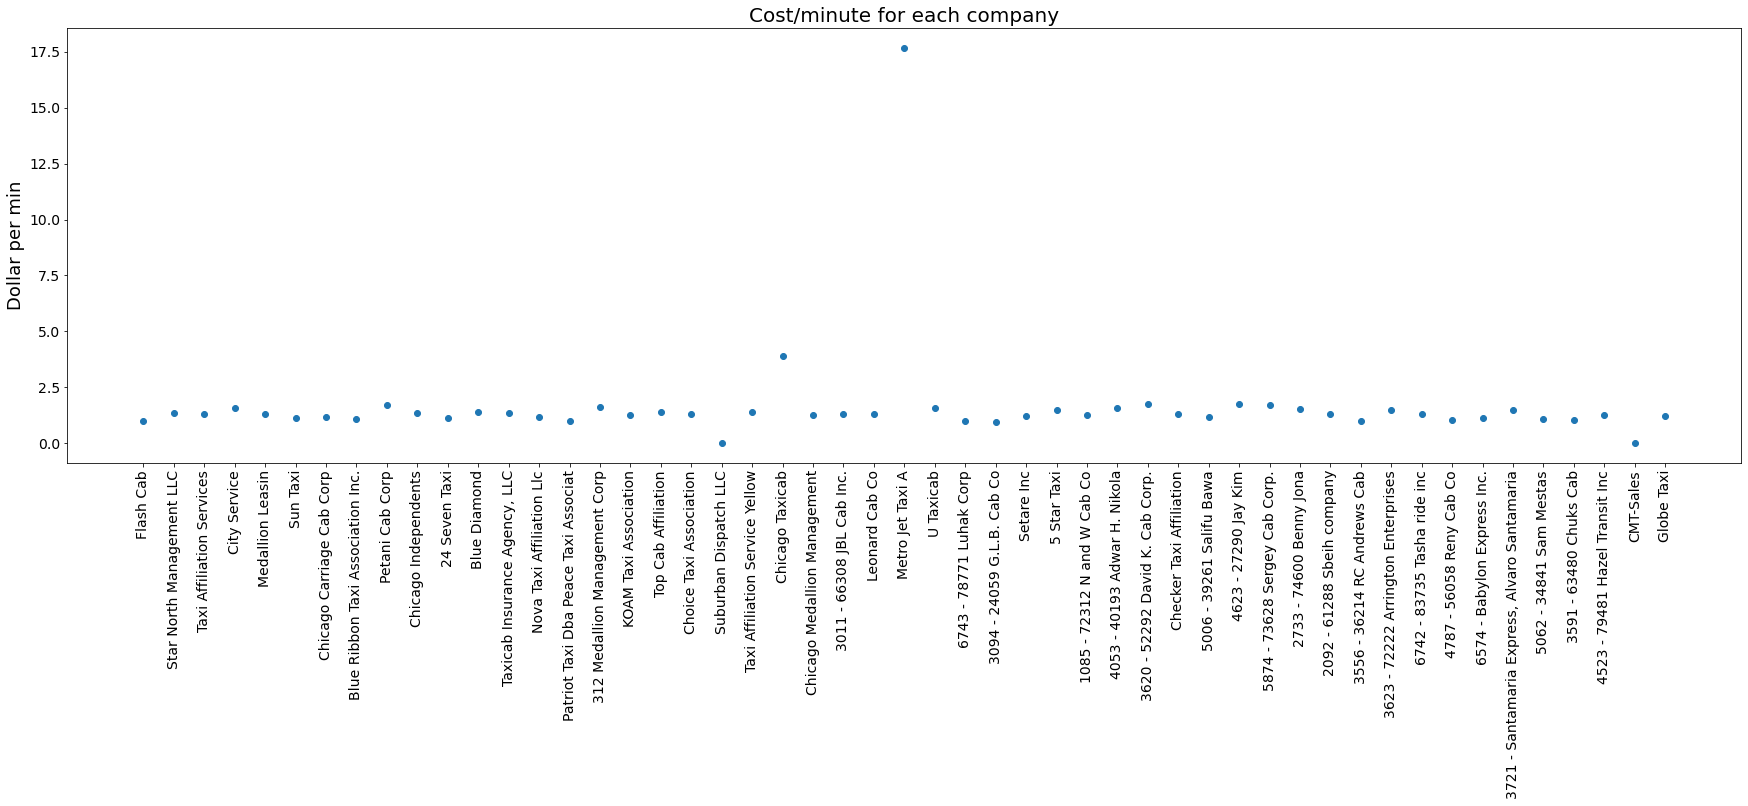

In [241]:
plt.figure(figsize=(30, 8))
plt.scatter(company_names, dollar_per_min)
plt.ylabel('Dollar per min', fontsize = 18)
plt.title('Cost/minute for each company', fontsize = 20)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xticks(rotation=90)
plt.show()

In [242]:
### Provo in modo grezzo a filtrare i dati e a plottarli

In [243]:
### Provo in modo grezzo a filtrare i dati e a plottarli

### Provo in modo grezzo a filtrare i dati e a plottarli

#### TripMiles vs. Fare

### Linea sospetta (c)

In [244]:
#Isolo la linea piccolina (non la principale)
a = df[(df.Trip_Miles < 6) & (df.Trip_Miles > 0)]
b = a[(a.Fare < 300) & (a.Fare > 20)]
c = b[((b.Trip_Miles < 1.7) | (b.Fare > 60)) & ((b.Trip_Miles < 1) | (b.Fare > 35))]  #linea "sospetta" isolata

NameError: name 'c' is not defined

In [ ]:
plt.scatter(c.Trip_Miles, c.Fare, alpha = 0.1)
plt.xlabel('Trip Miles')
plt.ylabel('Fare')
plt.show()

In [ ]:
plt.scatter(c.Pickup_Centroid_Longitude, c.Fare, alpha = 0.1)
plt.xlabel('Trip Miles')
plt.ylabel('Fare')
plt.show()

#### Duration vs. Fare

In [ ]:
#TODO
e = df[df.Trip_Seconds < 15000]
f = e[e.Trip_Seconds > 0]

plt.scatter(f.Trip_Seconds, f.Fare, alpha = 0.1)
plt.xlabel('Trip Seconds')
plt.ylabel('Fare')
plt.show()

#### TimeStart vs. Fare

In [ ]:
plt.scatter(c.Trip_Start_Timestamp.dt.hour, c.Fare, alpha = 0.1)
plt.xlabel('Trip_Start_Timestamp')
plt.ylabel('Fare')
plt.show()

In [ ]:
subset = np.isnan(df.Fare)  #controlla quanti NaN ci sono
unique, counts = np.unique(subset, return_counts=True)
unique, counts  #ritorna il numero di occorrenze